In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="whitegrid")

In [14]:
# خلية 2️⃣ : إنشاء بيانات الطلاب 
students = pd.DataFrame({
    'student_id': range(1, 21),
    'age': [15,16,15,17,16,15,17,18,16,15,17,16,18,17,16,18,17,15,16,17],
    'study_hours': [2,5,3,6,4,2,7,8,4,3,6,5,9,7,4,10,8,2,5,7],
    'grade': [60,85,70,90,78,58,92,95,80,68,89,82,97,90,76,99,94,55,84,88]
})

students.head()


,student_id,age,study_hours,grade
0,1,15,2,60
1,2,16,5,85
2,3,15,3,70
3,4,17,6,90
4,5,16,4,78


In [15]:
# خلية 3️⃣ : إنشاء جدول الأنشطة
activities = pd.DataFrame({
    'student_id': range(1, 21),
    'activities': [
        ['Football', 'Music'],
        ['Music', 'Chess'],
        ['Football'],
        ['Music', 'Football', 'Chess'],
        ['Chess'],
        ['Football', 'Art'],
        ['Music', 'Art'],
        ['Art', 'Football'],
        ['Music', 'ScienceClub'],
        ['ScienceClub'],
        ['Chess', 'Music'],
        ['Football', 'Music'],
        ['Art', 'ScienceClub'],
        ['Football', 'Music', 'Chess'],
        ['ScienceClub', 'Music'],
        ['Music', 'Drama'],
        ['Drama', 'Art'],
        ['Chess', 'ScienceClub'],
        ['Football', 'Drama'],
        ['Music', 'Art', 'ScienceClub']
    ]
})

activities.head()


,student_id,activities
0,1,"[Football, Music]"
1,2,"[Music, Chess]"
2,3,[Football]
3,4,"[Music, Football, Chess]"
4,5,[Chess]


In [16]:
# خلية 4️⃣ : إنشاء جدول الدرجات
scores = pd.DataFrame({
    'student_id': range(1, 21),
    'Math': [60,85,70,90,78,58,92,95,80,68,89,82,97,90,76,99,94,55,84,88],
    'Science': [65,80,75,92,70,60,94,96,82,70,88,85,99,91,78,98,95,58,86,89],
    'English': [70,88,72,91,75,65,90,93,83,74,87,84,95,89,80,97,92,60,85,86]
})

scores.head()

,student_id,Math,Science,English
0,1,60,65,70
1,2,85,80,88
2,3,70,75,72
3,4,90,92,91
4,5,78,70,75


🔹 التنبؤ بدرجة طالب عمره 16 ويدرس 5 ساعات: 79.02


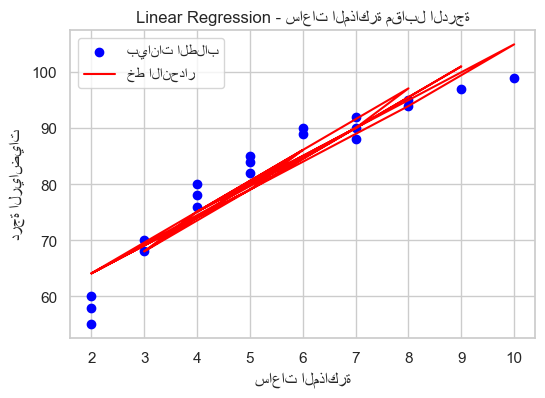

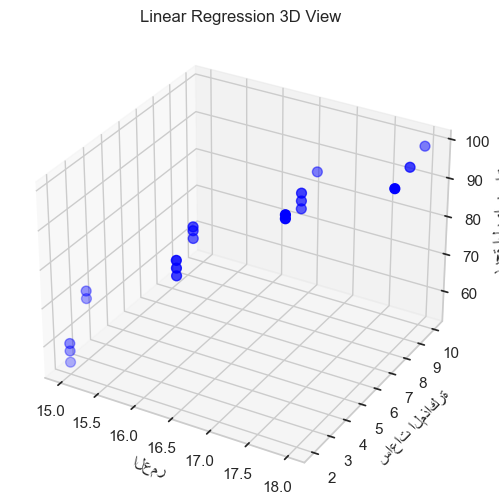

In [17]:
# خلية 5️⃣ : 🔹 Regression مع رسم 3D
X = students[['age', 'study_hours']]
y = students['grade']
model = LinearRegression()
model.fit(X, y)

# التنبؤ لطالب جديد
new_student = pd.DataFrame({'age':[16], 'study_hours':[5]})
predicted_grade = model.predict(new_student)
print(f"🔹 التنبؤ بدرجة طالب عمره 16 ويدرس 5 ساعات: {predicted_grade[0]:.2f}")

# رسم العلاقة 2D
plt.figure(figsize=(6,4))
plt.scatter(students['study_hours'], students['grade'], color='blue', label='بيانات الطلاب')
plt.plot(students['study_hours'], model.predict(X), color='red', label='خط الانحدار')
plt.xlabel('ساعات المذاكرة')
plt.ylabel('درجة الرياضيات')
plt.title('Linear Regression - ساعات المذاكرة مقابل الدرجة')
plt.legend()
plt.show()

# رسم العلاقة 3D (age + study_hours)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(students['age'], students['study_hours'], students['grade'], c='blue', s=50)
ax.set_xlabel('العمر')
ax.set_ylabel('ساعات المذاكرة')
ax.set_zlabel('درجة الرياضيات')
ax.set_title('Linear Regression 3D View')
plt.show()


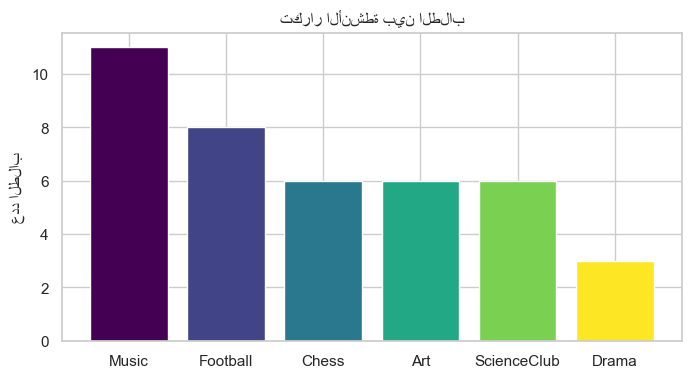

🔸 قواعد الارتباط بين الأنشطة:



,antecedents,consequents,support,confidence,lift
0,(ScienceClub),(Art),0.1,0.333333,1.111111
1,(Art),(ScienceClub),0.1,0.333333,1.111111
2,(Chess),(Music),0.2,0.666667,1.212121
3,(Music),(Chess),0.2,0.363636,1.212121
4,"(Chess, Music)",(Football),0.1,0.500000,1.250000
5,"(Chess, Football)",(Music),0.1,1.000000,1.818182
6,"(Football, Music)",(Chess),0.1,0.500000,1.666667
7,(Chess),"(Football, Music)",0.1,0.333333,1.666667
8,(Music),"(Chess, Football)",0.1,0.181818,1.818182
9,(Football),"(Chess, Music)",0.1,0.250000,1.250000


In [18]:

# خلية 6️⃣ : 🔸 Association (Apriori مع رسم bar chart للأنشطة)
mlb = MultiLabelBinarizer()
activities_encoded = pd.DataFrame(
    mlb.fit_transform(activities['activities']),
    columns=mlb.classes_,
    index=activities['student_id']
)
activities_encoded = activities_encoded.astype(bool)  # لتفادي التحذير

# bar chart لتكرار كل نشاط
activity_counts = activities_encoded.sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(activity_counts.index, activity_counts.values, color=plt.cm.viridis(np.linspace(0,1,len(activity_counts))))
plt.title("تكرار الأنشطة بين الطلاب")
plt.ylabel("عدد الطلاب")
plt.show()


# استخراج المجموعات المتكررة
frequent_itemsets = apriori(activities_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("🔸 قواعد الارتباط بين الأنشطة:\n")
if rules.empty:
    print("⚠️ لا توجد قواعد ارتباط بهذه القيم.")
else:
    display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


🔹 مصفوفة التشابه بين الطلاب (0 إلى 1):


student_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
student_id,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


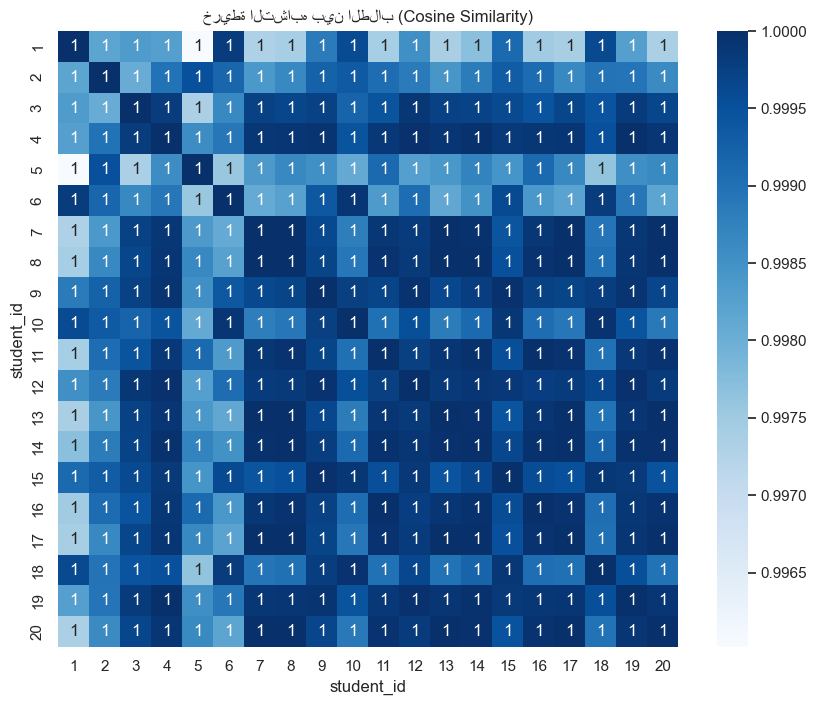


👬 أكثر طالبان متشابهان هما الطالب 8 والطالب 17 بدرجة تشابه 1.00


In [19]:

# خلية 7️⃣ : 🔹 Similarity مع Heatmap
score_matrix = scores[['Math', 'Science', 'English']]
similarity_matrix = cosine_similarity(score_matrix)
similarity_df = pd.DataFrame(similarity_matrix,
                             index=scores['student_id'],
                             columns=scores['student_id'])

print("🔹 مصفوفة التشابه بين الطلاب (0 إلى 1):")
display(similarity_df.round(2))

# heatmap للتشابه
plt.figure(figsize=(10,8))
sns.heatmap(similarity_df, annot=True, cmap='Blues')
plt.title("خريطة التشابه بين الطلاب (Cosine Similarity)")
plt.show()

# الطالبان الأكثر تشابهاً
similarity_df.values[np.tril_indices_from(similarity_df)] = 0
max_sim = similarity_df.values.max()
pair = np.where(similarity_df == max_sim)
print(f"\n👬 أكثر طالبان متشابهان هما الطالب {pair[0][0]+1} والطالب {pair[1][0]+1} بدرجة تشابه {max_sim:.2f}")